In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import autoviz

In [41]:
df=pd.read_csv('netflix_titles.csv')

In [42]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [44]:
df.shape

(8807, 12)

In [45]:
df.describe().round()

,release_year
count,8807.0
mean,2014.0
std,9.0
min,1925.0
25%,2013.0
50%,2017.0
75%,2019.0
max,2021.0


## MEDIAN YEAR = 2017

In [46]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## OSERVATION : This shows that out of 8807 rows, 2634 entries in 'director' series is missing. Now, let's calculate the percentage of missing data

In [47]:
((df.isnull().sum()/len(df))*100).round(2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [48]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## OBSERVATION : 'show_id' and 'title' have all unique entries as the number of unique entries in these series matches total length of df.

## Find out the distributuion of Movies and TV Shows in 'type' column.

In [49]:
type_distribution = (df['type'].value_counts(normalize=True))*100
type_distribution

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

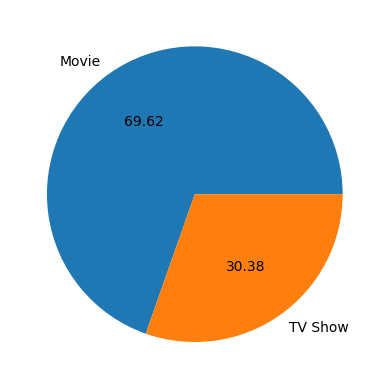

In [50]:
plt.pie(x=type_distribution, labels=type_distribution.index, autopct='%.2f')
plt.show()

## Now, let's split the string containg CAST into a list.

Here, we aim to convert the DataFrame such that there is 1 row for each cast.
For example, the CAST of Kota Factory is "Mayur More, Jitendra Kumar , Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar".

We want to convert it a list, i.e, ['Mayur More','Jitendra Kumar','Ranjan Raj','Alam Khan','Ahsaas Channa','Revathi Pillai','Urvi Singh','Arun Kumar']

And then have 1 row for Mayur More, 1 for Jitendra Kumar and so on.

In [51]:
cast_list=list(df['cast'].apply(lambda x: str(x).split(', ')))
cast_list[:5]

[['nan'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['nan'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar']]

In [52]:
cast_df=df[['title']]
cast_df['cast']=cast_list
cast_df=cast_df.explode('cast')
cast_df

<ipython-input-52-4e0ae9c46253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_df['cast']=cast_list


,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba
...,...,...
8806,Zubaan,Manish Chaudhary
8806,Zubaan,Meghna Malik
8806,Zubaan,Malkeet Rauni
8806,Zubaan,Anita Shabdish


In [53]:
cast_df['cast'].value_counts()

nan                        825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: cast, Length: 36440, dtype: int64

#LEt's repeat these steps for DIRECTOR series

In [54]:
director_list=list(df['director'].apply(lambda x:str(x).split(', ')))
director_list[:5]

[['Kirsten Johnson'], ['nan'], ['Julien Leclercq'], ['nan'], ['nan']]

In [55]:
director_df=df[['title']]
director_df['director']=director_list
director_df=director_df.explode('director')
director_df

<ipython-input-55-3a8e2d4ea1f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_df['director']=director_list


,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
8802,Zodiac,David Fincher
8803,Zombie Dumb,nan
8804,Zombieland,Ruben Fleischer
8805,Zoom,Peter Hewitt


#LEt's repeat these steps for COUNTRY series

In [56]:
country_list=list(df['country'].apply(lambda x:str(x).split(', ')))
country_list[:5]

[['United States'], ['South Africa'], ['nan'], ['nan'], ['India']]

In [57]:
country_df = df[['title']]
country_df['country']=country_list
country_df=country_df.explode('country')
country_df

<ipython-input-57-a0f1abd35141>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['country']=country_list


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
8802,Zodiac,United States
8803,Zombie Dumb,nan
8804,Zombieland,United States
8805,Zoom,United States


#LEt's repeat these steps for LISTED_IN series

In [58]:
listed_in_list=list(df['listed_in'].apply(lambda x:str(x).split(', ')))
listed_in_list[:5]

[['Documentaries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Docuseries', 'Reality TV'],
 ['International TV Shows', 'Romantic TV Shows', 'TV Comedies']]

In [59]:
listed_in_df=df[['title']]
listed_in_df['listed_in']=listed_in_list
listed_in_df=listed_in_df.explode('listed_in')
listed_in_df

<ipython-input-59-775b81cbe4b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listed_in_df['listed_in']=listed_in_list


,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows
...,...,...
8805,Zoom,Children & Family Movies
8805,Zoom,Comedies
8806,Zubaan,Dramas
8806,Zubaan,International Movies


# ⬆ These are the final CAST, DIRECTOR, COUNTRY & LISTED_IN DataFrames that we wanted to create

### Now, let's merge 'df' with 'cast_df','director_df','country_df','listed_in_df' and get a 'final_df'

In [60]:
final_df=df.merge(cast_df,on='title')
final_df=final_df.merge(director_df,on='title')
final_df=final_df.merge(country_df,on='title')
final_df=final_df.merge(listed_in_df,on='title')
final_df.head()

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in_x,description,cast_y,director_y,country_y,listed_in_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,International TV Shows


In [61]:
final_df.drop(columns={'cast_x','director_x','country_x','listed_in_x'},inplace=True)
final_df

,show_id,type,title,date_added,release_year,rating,duration,description,cast_y,director_y,country_y,listed_in_y
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,International Movies
201987,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,Music & Musicals
201988,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Dramas
201989,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [62]:
final_df.rename(columns={'cast_y':'cast','director_y':'director','country_y':'country','listed_in_y':'listed_in'},inplace=True)
final_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,International TV Shows


In [63]:
final_df['cast'].value_counts()

nan               2146
Liam Neeson        161
Alfred Molina      160
John Krasinski     139
Salma Hayek        130
                  ... 
Dario Yazbek         1
Corinne Foxx         1
Jacob Craner         1
Laila Berzins        1
Richard Ryan         1
Name: cast, Length: 36440, dtype: int64

## Now, let's separate the movies and tv shows in two different dataframes

In [64]:
movies_df = final_df.loc[final_df['type']=='Movie']
movies_df.reset_index(inplace=True)
movies_df.head()

,index,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,159,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,Robert Cullen,nan,Children & Family Movies
2,160,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,José Luis Ucha,nan,Children & Family Movies
3,161,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,Robert Cullen,nan,Children & Family Movies
4,162,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,José Luis Ucha,nan,Children & Family Movies


In [65]:
tvshows_df = final_df.loc[final_df['type']=='TV Show']
tvshows_df.reset_index(inplace=True)
tvshows_df.head()

,index,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,International TV Shows
1,2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Dramas
2,3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Mysteries
3,4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,International TV Shows
4,5,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,TV Dramas


# Now, Let's explore Movies DataFrame

In [66]:
movies_df.drop(columns='index',inplace=True)
movies_df.describe()

<ipython-input-66-2716e73b15b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.drop(columns='index',inplace=True)


,release_year
count,145843.000000
mean,2012.135454
std,9.805300
min,1942.000000
25%,2010.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


### OBservation : Median Release Year of the entire DataFrame, i.e, Movies + TV Shows is 2017, whereas Median Release Year of the 'Movies' DataFrame is 2016.

## Now, let's explore the distribution of movies based on duration

In [67]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145843 entries, 0 to 145842
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       145843 non-null  object
 1   type          145843 non-null  object
 2   title         145843 non-null  object
 3   date_added    145843 non-null  object
 4   release_year  145843 non-null  int64 
 5   rating        145834 non-null  object
 6   duration      145840 non-null  object
 7   description   145843 non-null  object
 8   cast          145843 non-null  object
 9   director      145843 non-null  object
 10  country       145843 non-null  object
 11  listed_in     145843 non-null  object
dtypes: int64(1), object(11)
memory usage: 13.4+ MB


# Observation : Duration Series has 3 missing values. We have to do data imputation.

In [68]:
movies_df.sort_values('duration').tail()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
81488,s5503,Movie,In the Shadow of Iris,"May 1, 2017",2016,TV-MA,99 min,The sudden disappearance of a wealthy banker's...,Camille Cottin,Jalil Lespert,Belgium,Dramas
21040,s1223,Movie,The Block Island Sound,"March 11, 2021",2020,TV-MA,99 min,"On an island, a fisherman's family faces horro...",Neville Archambault,Matthew McManus,United States,Independent Movies
82075,s5542,Movie,Louis C.K. 2017,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,Louis C.K.,United States,Movies
85522,s5795,Movie,Louis C.K.: Hilarious,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,Louis C.K.,United States,Movies
85555,s5814,Movie,Louis C.K.: Live at the Comedy Store,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...,Louis C.K.,Louis C.K.,United States,Movies


In [69]:
movies_df.loc[movies_df['director']=='Louis C.K.']

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
82075,s5542,Movie,Louis C.K. 2017,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,Louis C.K.,United States,Movies
85522,s5795,Movie,Louis C.K.: Hilarious,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,Louis C.K.,United States,Movies
85555,s5814,Movie,Louis C.K.: Live at the Comedy Store,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...,Louis C.K.,Louis C.K.,United States,Movies


### Observation : The missing values in DURATION series are actually there in RATING series. So, let's use these values for data imputation.

In [70]:
'''
movies_df.loc[82075].fillna('74 min',inplace=True)
throws an error 'SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame'
Similarly, movies_df.loc[85522].fillna('84 min') and movies_df.loc[85555].fillna('66 min') also throws the same error.

Reason --> Attempting to modify a DataFrame that is actually a view or a copy of the original DataFrame,
and not the original DataFrame itself. This can lead to unexpected behavior and should be handled carefully.

To address this warning, we can use the .loc accessor in a way that ensures we are working directly with the
original DataFrame and not a copy or view.

'''
movies_df.loc[82075, 'duration'] = '74 min'
movies_df.loc[85522, 'duration'] = '84 min'
movies_df.loc[85555, 'duration'] = '66 min'

movies_df.loc[movies_df['director']=='Louis C.K.']

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
82075,s5542,Movie,Louis C.K. 2017,"April 4, 2017",2017,74 min,74 min,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,Louis C.K.,United States,Movies
85522,s5795,Movie,Louis C.K.: Hilarious,"September 16, 2016",2010,84 min,84 min,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,Louis C.K.,United States,Movies
85555,s5814,Movie,Louis C.K.: Live at the Comedy Store,"August 15, 2016",2015,66 min,66 min,The comic puts his trademark hilarious/thought...,Louis C.K.,Louis C.K.,United States,Movies


## Now, let's convert the datatype to int after removing 'mins'

In [71]:
duration_list=list(movies_df['duration'].apply(lambda x : str(x).split(' ')))
duration_list=[i[0] for i in duration_list]
duration_list = list(map(int, duration_list))
duration_list[:10]

[90, 91, 91, 91, 91, 91, 91, 91, 91, 91]

In [72]:
duration_df=pd.DataFrame(duration_list)
duration_df.rename(columns={0:'duration'},inplace=True)
duration_df

,duration
0,90
1,91
2,91
3,91
4,91
...,...
145838,111
145839,111
145840,111
145841,111


## Now, let's replace the DURATION series of 'movies_df' with the DURATION list

In [76]:
movies_df.loc['duration']=duration_df['duration']
movies_df.drop('duration',inplace=True)

<ipython-input-76-6f08b66d4efa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.loc['duration']=duration_df['duration']
<ipython-input-76-6f08b66d4efa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.drop('duration',inplace=True)


In [77]:
movies_df['duration']=movies_df['duration'].astype(int)
movies_df

<ipython-input-77-15d5ac8bc086>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration']=movies_df['duration'].astype(int)


,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020.0,PG-13,90,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021.0,PG,91,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,Robert Cullen,nan,Children & Family Movies
2,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021.0,PG,91,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,José Luis Ucha,nan,Children & Family Movies
3,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021.0,PG,91,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,Robert Cullen,nan,Children & Family Movies
4,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021.0,PG,91,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,José Luis Ucha,nan,Children & Family Movies
...,...,...,...,...,...,...,...,...,...,...,...,...
145838,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,International Movies
145839,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,Music & Musicals
145840,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Dramas
145841,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [78]:
movies_df['duration'].describe().round(2)

count    145843.00
mean        106.86
std          24.70
min           3.00
25%          93.00
50%         104.00
75%         119.00
max         312.00
Name: duration, dtype: float64

## OBservation 1: The mean duration of a movie is about 107 minutes.
## OBservation 2: 75% of the movies have duration less than 2 Hours.

<Axes: xlabel='duration', ylabel='Count'>

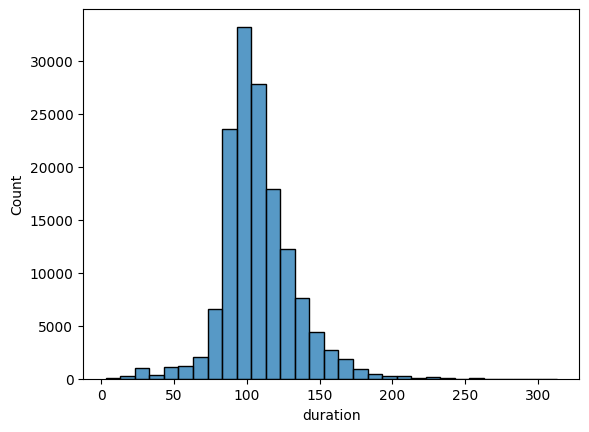

In [79]:
sns.histplot(x='duration',data=movies_df,binwidth=10)

## OBservation : Most movies have a duration of about 95 minutes.

# Let's fill up other missing values in the column 'cast'

In [80]:
movies_df.reset_index(inplace=True)
movies_df

,index,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020.0,PG-13,90,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,1,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021.0,PG,91,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,Robert Cullen,nan,Children & Family Movies
2,2,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021.0,PG,91,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,José Luis Ucha,nan,Children & Family Movies
3,3,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021.0,PG,91,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,Robert Cullen,nan,Children & Family Movies
4,4,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021.0,PG,91,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,José Luis Ucha,nan,Children & Family Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145838,145838,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,International Movies
145839,145839,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,Music & Musicals
145840,145840,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Dramas
145841,145841,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [83]:
movies_df.drop(columns=['index'],inplace=True)

<ipython-input-83-3dc0a06b7604>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.drop(columns=['index'],inplace=True)


In [84]:
movies_df.loc[movies_df['cast']=='nan'].tail()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
144578,s8747,Movie,Winnie,"February 26, 2018",2017.0,TV-14,85,Winnie Mandela speaks about her extraordinary ...,nan,Pascale Lamche,Finland,Documentaries
144579,s8747,Movie,Winnie,"February 26, 2018",2017.0,TV-14,85,Winnie Mandela speaks about her extraordinary ...,nan,Pascale Lamche,Finland,International Movies
144711,s8757,Movie,Woodstock,"August 13, 2019",2019.0,TV-MA,97,For the 50th anniversary of the legendary Wood...,nan,Barak Goodman,United States,Documentaries
144712,s8757,Movie,Woodstock,"August 13, 2019",2019.0,TV-MA,97,For the 50th anniversary of the legendary Wood...,nan,Barak Goodman,United States,Music & Musicals
144825,s8764,Movie,WWII: Report from the Aleutians,"March 31, 2017",1943.0,TV-PG,45,Filmmaker John Huston narrates this Oscar-nomi...,nan,John Huston,United States,Documentaries


In [85]:
movies_df['cast'].replace('nan','Unknown Actor',inplace=True)

<ipython-input-85-71f0c6de75d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['cast'].replace('nan','Unknown Actor',inplace=True)


# Now, let's fill missing values in 'director'.

## For this, mode of group of 'listed_in' and 'country' columns is used.

In [86]:
def director_nan(split_df):
  split_df.loc[split_df['director']=='nan']=split_df['director'].mode().iloc[0]
  return split_df

director_group=movies_df.groupby(['country','listed_in'])[['director']].apply(director_nan)
director_group

<ipython-input-86-2112280fb38f>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  director_group=movies_df.groupby(['country','listed_in'])[['director']].apply(director_nan)


,director
0,Kirsten Johnson
1,Robert Cullen
2,José Luis Ucha
3,Robert Cullen
4,José Luis Ucha
...,...
145838,Mozez Singh
145839,Mozez Singh
145840,Mozez Singh
145841,Mozez Singh


In [87]:
movies_df.loc['director']=director_group['director']
movies_df.drop('director',inplace=True)
movies_df.tail()

<ipython-input-87-f0ed5ea3defd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.loc['director']=director_group['director']
<ipython-input-87-f0ed5ea3defd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.drop('director',inplace=True)


,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
145838,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,International Movies
145839,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,Music & Musicals
145840,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Dramas
145841,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,International Movies
145842,s8807,Movie,Zubaan,"March 2, 2019",2015.0,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Music & Musicals


In [88]:
movies_df['director'].replace('nan','unknown_director',inplace=True)
movies_df.loc[movies_df['director']=='nan']

<ipython-input-88-a484edaf8878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['director'].replace('nan','unknown_director',inplace=True)


,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in


# Now, let's fill missing values in 'country' & 'rating' too

In [89]:
movies_df['country'].replace('nan','unknown_country',inplace=True)
movies_df['rating'].fillna('unknown_rating',inplace=True)
movies_df.isna().sum()

<ipython-input-89-8579ccc9e54b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['country'].replace('nan','unknown_country',inplace=True)
<ipython-input-89-8579ccc9e54b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['rating'].fillna('unknown_rating',inplace=True)


show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
cast            0
director        0
country         0
listed_in       0
dtype: int64

## Now, We have filled all null values in Categorical columns with 'unknown_column_name'


## Let's repeat these imputations for tvshows_df also

In [90]:
tvshows_df.head()

,index,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,International TV Shows
1,2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Dramas
2,3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Mysteries
3,4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,International TV Shows
4,5,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,TV Dramas


In [92]:
tvshows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56148 entries, 0 to 56147
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         56148 non-null  int64 
 1   show_id       56148 non-null  object
 2   type          56148 non-null  object
 3   title         56148 non-null  object
 4   date_added    55990 non-null  object
 5   release_year  56148 non-null  int64 
 6   rating        56090 non-null  object
 7   duration      56148 non-null  object
 8   description   56148 non-null  object
 9   cast          56148 non-null  object
 10  director      56148 non-null  object
 11  country       56148 non-null  object
 12  listed_in     56148 non-null  object
dtypes: int64(2), object(11)
memory usage: 5.6+ MB


### Observation 1 : Rating Series has 58 missing values. We have to do data imputation.

### Observation 2 : Date_added Series has 158 missing values. We have to do data imputation.

### Observation 3 : The data type of duration is 'object'. We have to change it to 'int'.

In [93]:
tvshows_df.drop(columns='index',inplace=True)
tvshows_df.describe()

<ipython-input-93-0b64a062da7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_df.drop(columns='index',inplace=True)


,release_year
count,56148.000000
mean,2016.874902
std,5.069625
min,1925.000000
25%,2016.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


### OBservation : Median Release Year of the entire DataFrame, i.e, Movies + TV Shows is 2017, whereas Median Release Year of the 'TvShows' DataFrame is 2018.

## Now, let's convert the datatype to int after removing 'seasons'

In [94]:
duration_list_tv=list(tvshows_df['duration'].apply(lambda x : str(x).split(' ')))
duration_list_tv=[i[0] for i in duration_list_tv]
duration_list_tv = list(map(int, duration_list_tv))
duration_list_tv[:10]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [95]:
duration_df_tv=pd.DataFrame(duration_list_tv)
duration_df_tv.rename(columns={0:'duration'},inplace=True)
duration_df_tv

,duration
0,2
1,2
2,2
3,2
4,2
...,...
56143,1
56144,1
56145,2
56146,2


## Now, let's replace the DURATION series of 'tvshows_df' with the DURATION list_tv

In [96]:
tvshows_df['duration']=duration_df_tv['duration']
tvshows_df['duration']=tvshows_df['duration'].astype(int)
tvshows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56148 entries, 0 to 56147
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       56148 non-null  object
 1   type          56148 non-null  object
 2   title         56148 non-null  object
 3   date_added    55990 non-null  object
 4   release_year  56148 non-null  int64 
 5   rating        56090 non-null  object
 6   duration      56148 non-null  int64 
 7   description   56148 non-null  object
 8   cast          56148 non-null  object
 9   director      56148 non-null  object
 10  country       56148 non-null  object
 11  listed_in     56148 non-null  object
dtypes: int64(2), object(10)
memory usage: 5.1+ MB


<ipython-input-96-2bf6b5ddc8d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_df['duration']=duration_df_tv['duration']
<ipython-input-96-2bf6b5ddc8d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_df['duration']=tvshows_df['duration'].astype(int)


In [97]:
tvshows_df['duration'].describe().round(2)

count    56148.00
mean         1.93
std          1.81
min          1.00
25%          1.00
50%          1.00
75%          2.00
max         17.00
Name: duration, dtype: float64

### OBservation 1: The mean duration of a tv show is about 2 seasons.
### OBservation 2: 75% of the movies have duration less than 2 seasons.

<Axes: xlabel='duration', ylabel='Count'>

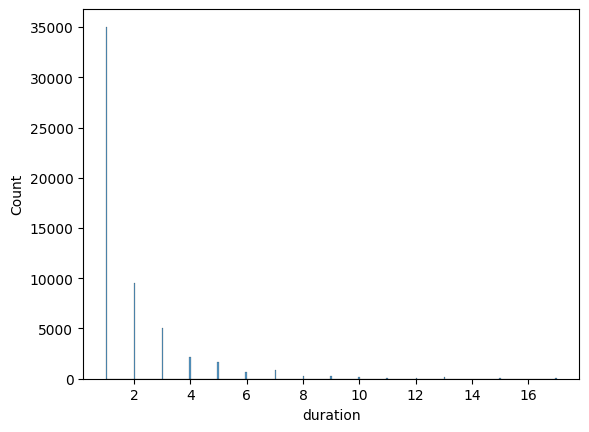

In [98]:
sns.histplot(x='duration',data=tvshows_df)

### Observation : Most TV Shows have only 1 season

In [99]:
tvshows_df.reset_index(inplace=True)

In [101]:
tvshows_df.drop(columns=['index'],inplace=True)
tvshows_df.head()

<ipython-input-101-fde4f641a649>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_df.drop(columns=['index'],inplace=True)


,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,International TV Shows
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Dramas
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Mysteries
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,International TV Shows
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,TV Dramas


# Let's fill up other missing values in the column 'cast','director','rating','date_added' & 'country'

In [102]:
tvshows_df['cast'].replace('nan','Unknown Actor',inplace=True)
tvshows_df['director'].replace('nan','Unknown Director',inplace=True)
tvshows_df['rating'].fillna('unknown_rating',inplace=True)
tvshows_df['date_added'].fillna('Unknown Date',inplace=True)
tvshows_df['country'].replace('nan','Unknown Country',inplace=True)
tvshows_df

<ipython-input-102-f5dd3a58859c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_df['cast'].replace('nan','Unknown Actor',inplace=True)
<ipython-input-102-f5dd3a58859c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_df['director'].replace('nan','Unknown Director',inplace=True)
<ipython-input-102-f5dd3a58859c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_df['rating'].fillna('unknown_rating',inplace=True)
<

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown Director,South Africa,International TV Shows
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown Director,South Africa,TV Dramas
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown Director,South Africa,TV Mysteries
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown Director,South Africa,International TV Shows
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown Director,South Africa,TV Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...
56143,s8801,TV Show,Zindagi Gulzar Hai,"December 15, 2016",2012,TV-PG,1,"Strong-willed, middle-class Kashaf and carefre...",Hina Khawaja Bayat,Unknown Director,Pakistan,Romantic TV Shows
56144,s8801,TV Show,Zindagi Gulzar Hai,"December 15, 2016",2012,TV-PG,1,"Strong-willed, middle-class Kashaf and carefre...",Hina Khawaja Bayat,Unknown Director,Pakistan,TV Dramas
56145,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2,"While living alone in a spooky town, a young g...",Unknown Actor,Unknown Director,Unknown Country,Kids' TV
56146,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2,"While living alone in a spooky town, a young g...",Unknown Actor,Unknown Director,Unknown Country,Korean TV Shows


In [103]:
tvshows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56148 entries, 0 to 56147
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       56148 non-null  object
 1   type          56148 non-null  object
 2   title         56148 non-null  object
 3   date_added    56148 non-null  object
 4   release_year  56148 non-null  int64 
 5   rating        56148 non-null  object
 6   duration      56148 non-null  int64 
 7   description   56148 non-null  object
 8   cast          56148 non-null  object
 9   director      56148 non-null  object
 10  country       56148 non-null  object
 11  listed_in     56148 non-null  object
dtypes: int64(2), object(10)
memory usage: 5.1+ MB


#1. Find the counts of each categorical variable both using graphical and non-graphical analysis.


In [106]:
'''
Since, movies_df is obtained by exploding,
therefore, using unique() would be better over value_counts().
'''
pd.DataFrame(movies_df.nunique()).rename(columns={0:'count'})

,count
show_id,6131
type,1
title,6131
date_added,1533
release_year,73
rating,18
duration,205
description,6105
cast,25952
director,4778


In [107]:
def value_plot(df, y, figscale=1):
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(True)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['count'], **{})
chart

In [152]:
pd.DataFrame(tvshows_df.nunique()).rename(columns={0:'count'})

,count
show_id,2676
type,1
title,2676
date_added,1012
release_year,46
rating,10
duration,15
description,2672
cast,14864
director,300


In [151]:
def value_plot(df, y, figscale=1):
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(True)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['count'], **{})
chart

#2. Comparison of tv shows vs movies.
  a. Find the number of movies produced in each country and pick the top 10 countries.

In [110]:
country_group_movie=movies_df.groupby('country')[['title']].nunique()
country_group_movie['title'].astype(int)
country_group_movie.reset_index(inplace=True)
country_group_movie=country_group_movie.sort_values('title',ascending=False).head(11)
country_group_movie.drop(122,inplace=True)
country_group_movie

,country,title
114,United States,2751
43,India,962
112,United Kingdom,532
20,Canada,319
34,France,303
36,Germany,182
100,Spain,171
51,Japan,119
23,China,114
65,Mexico,111


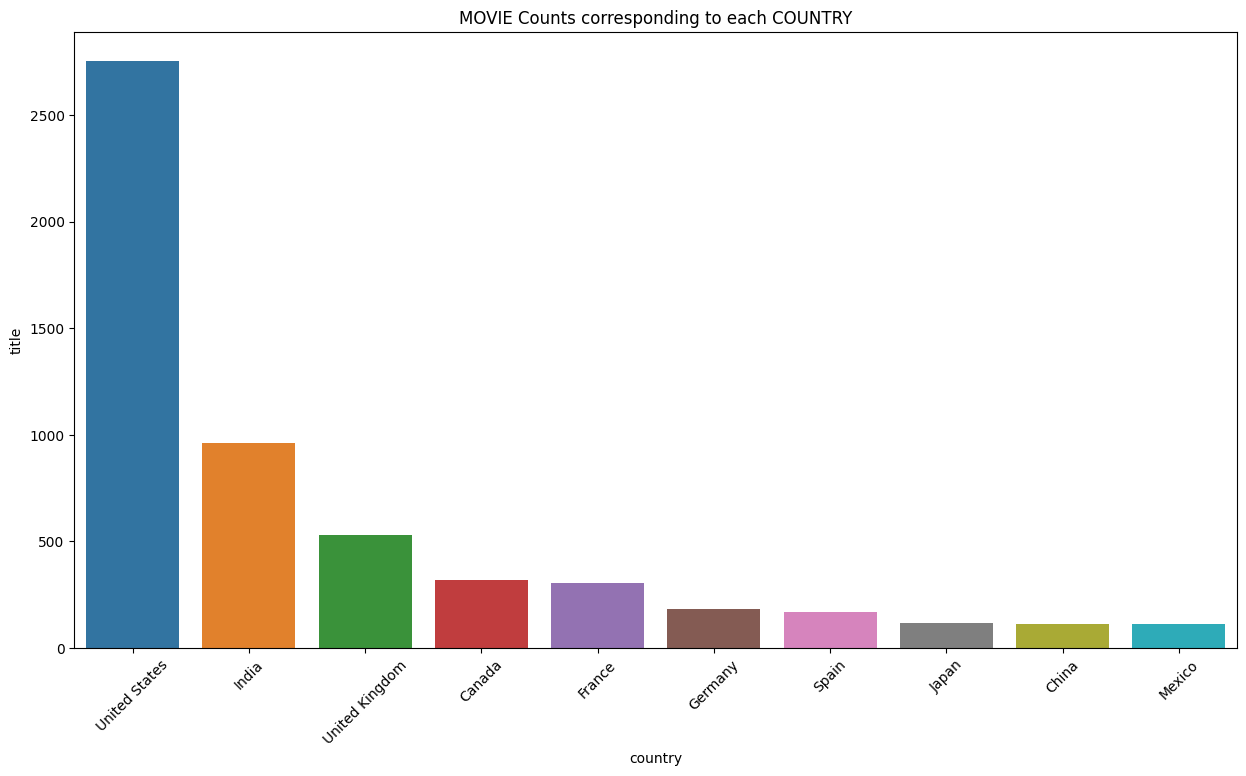

In [150]:
plt.figure(figsize=(15,8))
sns.barplot(x='country',y='title',data=country_group_movie)
plt.xticks(rotation=45)
plt.title('MOVIE Counts corresponding to each COUNTRY')

plt.show()

b. Find the number of Tv-Shows produced in each country and pick the top 10 countries

In [112]:
country_group_tv=tvshows_df.groupby('country')[['title']].nunique()
country_group_tv['title'].astype(int)
country_group_tv.reset_index(inplace=True)
country_group_tv=country_group_tv.sort_values('title',ascending=False).head(11)
country_group_tv.drop(64,inplace=True)
country_group_tv

,country,title
63,United States,938
62,United Kingdom,272
30,Japan,199
52,South Korea,170
8,Canada,126
19,France,90
25,India,84
57,Taiwan,70
2,Australia,66
53,Spain,61


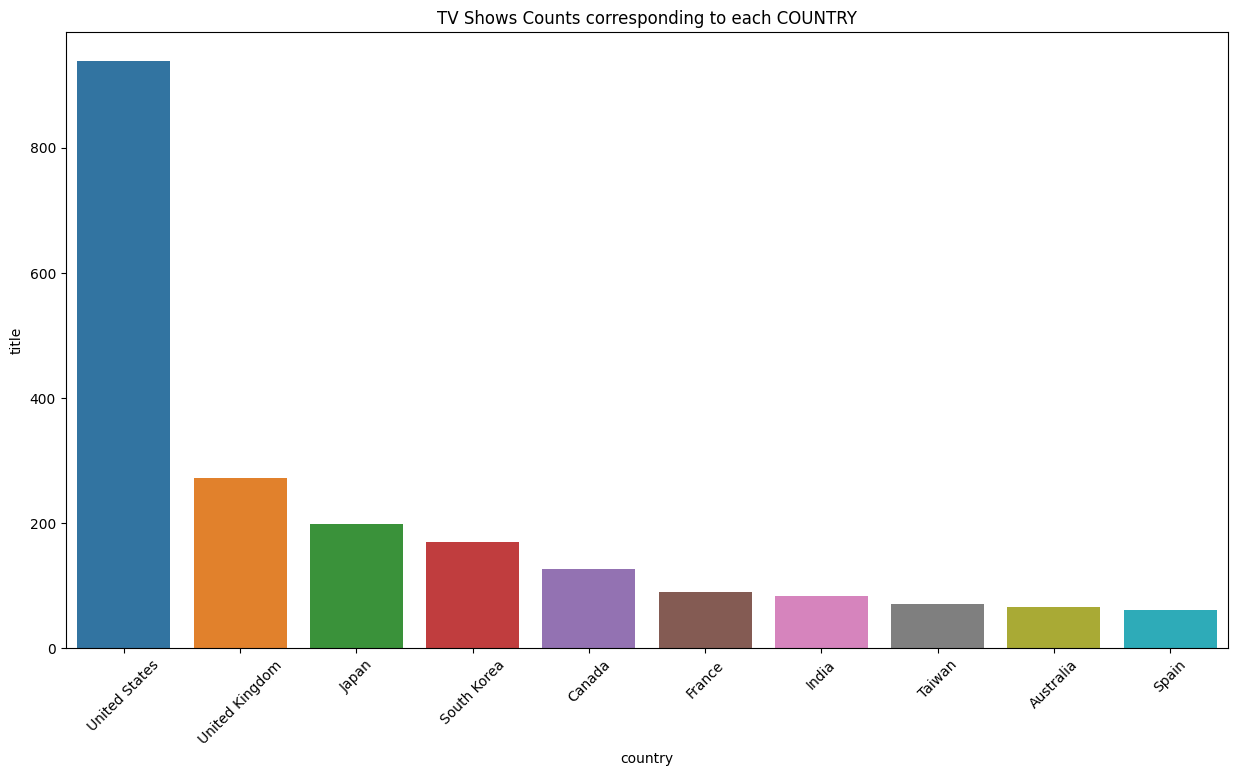

In [149]:
plt.figure(figsize=(15,8))
sns.barplot(x='country',y='title',data=country_group_tv)
plt.xticks(rotation=45)
plt.title('TV Shows Counts corresponding to each COUNTRY')

plt.show()

# 3. What is the best time to launch a TV show?
  a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [114]:
movies_df['date_added']=pd.to_datetime(movies_df['date_added'])

movies_df['day']=movies_df['date_added'].dt.day
movies_df['week']=movies_df['date_added'].dt.week
movies_df['month']=movies_df['date_added'].dt.month
movies_df['added_year']=movies_df['date_added'].dt.year

<ipython-input-114-1c485adb33d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['date_added']=pd.to_datetime(movies_df['date_added'])
<ipython-input-114-1c485adb33d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['day']=movies_df['date_added'].dt.day
<ipython-input-114-1c485adb33d8>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  movies_df['week']=movies_df['date_added'].dt.week
<ipython-input-114-1c4

In [115]:
week_group_movie=movies_df.groupby('week')[['title']].nunique()
week_group_movie['title'].astype(int)
week_group_movie.reset_index(inplace=True)
week_group_movie=week_group_movie.sort_values('title',ascending=False).head(10)
week_group_movie

,week,title
0,1,316
43,44,243
39,40,215
8,9,207
25,26,195
34,35,189
30,31,185
12,13,174
17,18,173
26,27,154


In [119]:
tvshows_df['date_added']=pd.to_datetime(tvshows_df['date_added'])


tvshows_df['day']=tvshows_df['date_added'].dt.day
tvshows_df['week']=tvshows_df['date_added'].dt.week
tvshows_df['month']=tvshows_df['date_added'].dt.month
tvshows_df['added_year']=tvshows_df['date_added'].dt.year

<ipython-input-119-7e4e656c317e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_df['date_added']=pd.to_datetime(tvshows_df['date_added'])
<ipython-input-119-7e4e656c317e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_df['day']=tvshows_df['date_added'].dt.day
<ipython-input-119-7e4e656c317e>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  tvshows_df['week']=tvshows_df['date_added'].dt.week
<ipython-input-1

In [120]:
def convert_date(date_str):
  if date_str == 'Unknown Date':
    return pd.NaT
  else:
    return pd.to_datetime(date_str)

tvshows_df['date_added']=tvshows_df['date_added'].apply(convert_date)
tvshows_df

<ipython-input-120-4b46d02bfaa9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_df['date_added']=tvshows_df['date_added'].apply(convert_date)


,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in,day,week,month,added_year
0,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown Director,South Africa,International TV Shows,24.0,38.0,9.0,2021.0
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown Director,South Africa,TV Dramas,24.0,38.0,9.0,2021.0
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown Director,South Africa,TV Mysteries,24.0,38.0,9.0,2021.0
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown Director,South Africa,International TV Shows,24.0,38.0,9.0,2021.0
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown Director,South Africa,TV Dramas,24.0,38.0,9.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56143,s8801,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,TV-PG,1,"Strong-willed, middle-class Kashaf and carefre...",Hina Khawaja Bayat,Unknown Director,Pakistan,Romantic TV Shows,15.0,50.0,12.0,2016.0
56144,s8801,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,TV-PG,1,"Strong-willed, middle-class Kashaf and carefre...",Hina Khawaja Bayat,Unknown Director,Pakistan,TV Dramas,15.0,50.0,12.0,2016.0
56145,s8804,TV Show,Zombie Dumb,2019-07-01,2018,TV-Y7,2,"While living alone in a spooky town, a young g...",Unknown Actor,Unknown Director,Unknown Country,Kids' TV,1.0,27.0,7.0,2019.0
56146,s8804,TV Show,Zombie Dumb,2019-07-01,2018,TV-Y7,2,"While living alone in a spooky town, a young g...",Unknown Actor,Unknown Director,Unknown Country,Korean TV Shows,1.0,27.0,7.0,2019.0


In [121]:
week_group_tv=tvshows_df.groupby('week')[['title']].nunique()
week_group_tv['title'].astype(int)
week_group_tv.reset_index(inplace=True)
week_group_tv=week_group_tv.sort_values('title',ascending=False).head(10)
week_group_tv

,week,title
26,27.0,86
30,31.0,83
12,13.0,76
43,44.0,75
23,24.0,75
34,35.0,74
4,5.0,73
25,26.0,73
39,40.0,72
49,50.0,70


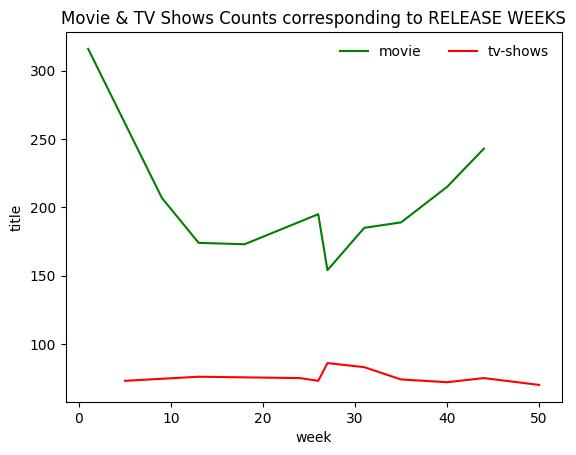

In [148]:
sns.lineplot(x='week',y='title',data=week_group_movie,color='g',label='movie')
sns.lineplot(x='week',y='title',data=week_group_tv,color='r',label='tv-shows')
plt.legend(ncols=2,frameon=False)
plt.title('Movie & TV Shows Counts corresponding to RELEASE WEEKS')

plt.show()

## OBservation :
Large number of movies are released in the spirit of celebration of New Year. However, It's not the case with tv-shows.

Also, the number of movie releases spikes up in the middle and once again towards the end of the yearwhich may be attributed to Festive Seasons.

However, in case of tv-shows,the number of releases only increases in the middle of the year.

b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

In [123]:
month_group_movie=movies_df.groupby('month')[['title']].nunique()
month_group_movie['title'].astype(int)
month_group_movie.reset_index(inplace=True)
month_group_movie=month_group_movie.sort_values('title',ascending=False).head(10)
month_group_movie

,month,title
6,7,565
3,4,550
11,12,547
0,1,546
9,10,545
2,3,529
7,8,519
8,9,519
10,11,498
5,6,492


In [124]:
month_group_tv=tvshows_df.groupby('month')[['title']].nunique()
month_group_tv['title'].astype(int)
month_group_tv.reset_index(inplace=True)
month_group_tv=month_group_tv.sort_values('title',ascending=False).head(10)
month_group_tv

,month,title
11,12.0,266
6,7.0,262
8,9.0,251
5,6.0,236
7,8.0,236
9,10.0,215
3,4.0,214
2,3.0,213
10,11.0,207
4,5.0,193


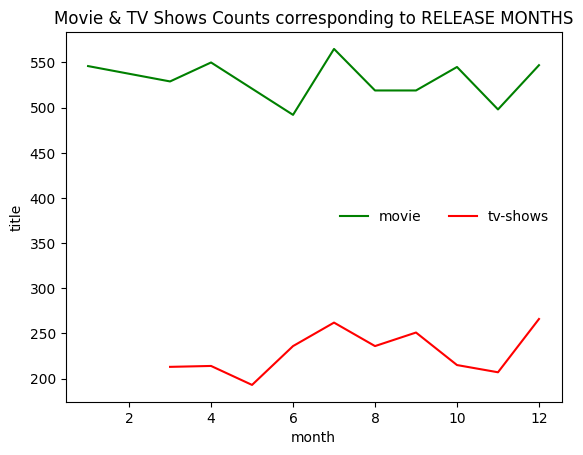

In [147]:
sns.lineplot(x='month',y='title',data=month_group_movie,color='g',label='movie')
sns.lineplot(x='month',y='title',data=month_group_tv,color='r',label='tv-shows')
plt.legend(ncols=2,frameon=False)
plt.title('Movie & TV Shows Counts corresponding to RELEASE MONTHS')

plt.show()

## OBservation :

The number of movie releases spikes up in the middle and once again towards the end of the year which may be attributed to Festive Seasons.

# Hence, the best time to launch a TV Show or a MOVIE is either near JULY or near DECEMBER

# 4. Analysis of actors/directors of different types of shows/movies.
a. Identify the top 10 actors who have appeared in most movies or TV shows.

In [126]:
actor_group_movie=movies_df.groupby('cast')[['title']].nunique()
actor_group_movie['title'].astype(int)
actor_group_movie.reset_index(inplace=True)
actor_group_movie=actor_group_movie.sort_values('title',ascending=False).head(11)
actor_group_movie.drop(24460,inplace=True)
actor_group_movie

,cast,title
2105,Anupam Kher,42
21781,Shah Rukh Khan,35
17193,Naseeruddin Shah,32
18064,Om Puri,30
638,Akshay Kumar,30
18329,Paresh Rawal,28
12031,Julie Tejwani,28
1313,Amitabh Bachchan,28
20692,Rupa Bhimani,27
3354,Boman Irani,27


In [127]:
actor_group_tv=tvshows_df.groupby('cast')[['title']].nunique()
actor_group_tv['title'].astype(int)
actor_group_tv.reset_index(inplace=True)
actor_group_tv=actor_group_tv.sort_values('title',ascending=False).head(11)
actor_group_tv.drop(13892,inplace=True)
actor_group_tv

,cast,title
13230,Takahiro Sakurai,25
14581,Yuki Kaji,19
6804,Junichi Suwabe,17
2874,Daisuke Ono,17
252,Ai Kayano,17
14565,Yuichi Nakamura,16
6761,Jun Fukuyama,15
14497,Yoshimasa Hosoya,15
3127,David Attenborough,14
14050,Vincent Tong,13


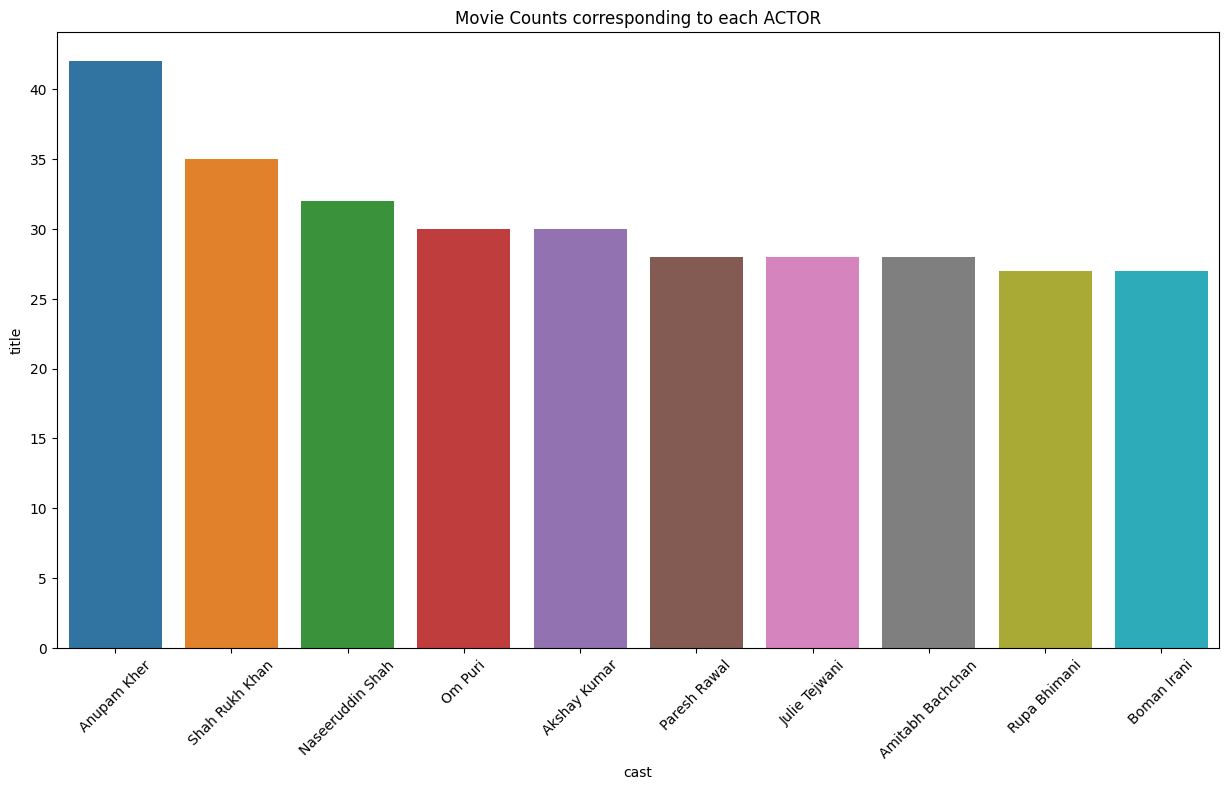

In [146]:
plt.figure(figsize=(15,8))
sns.barplot(x='cast',y='title',data=actor_group_movie)
plt.xticks(rotation=45)
plt.title('Movie Counts corresponding to each ACTOR')

plt.show()

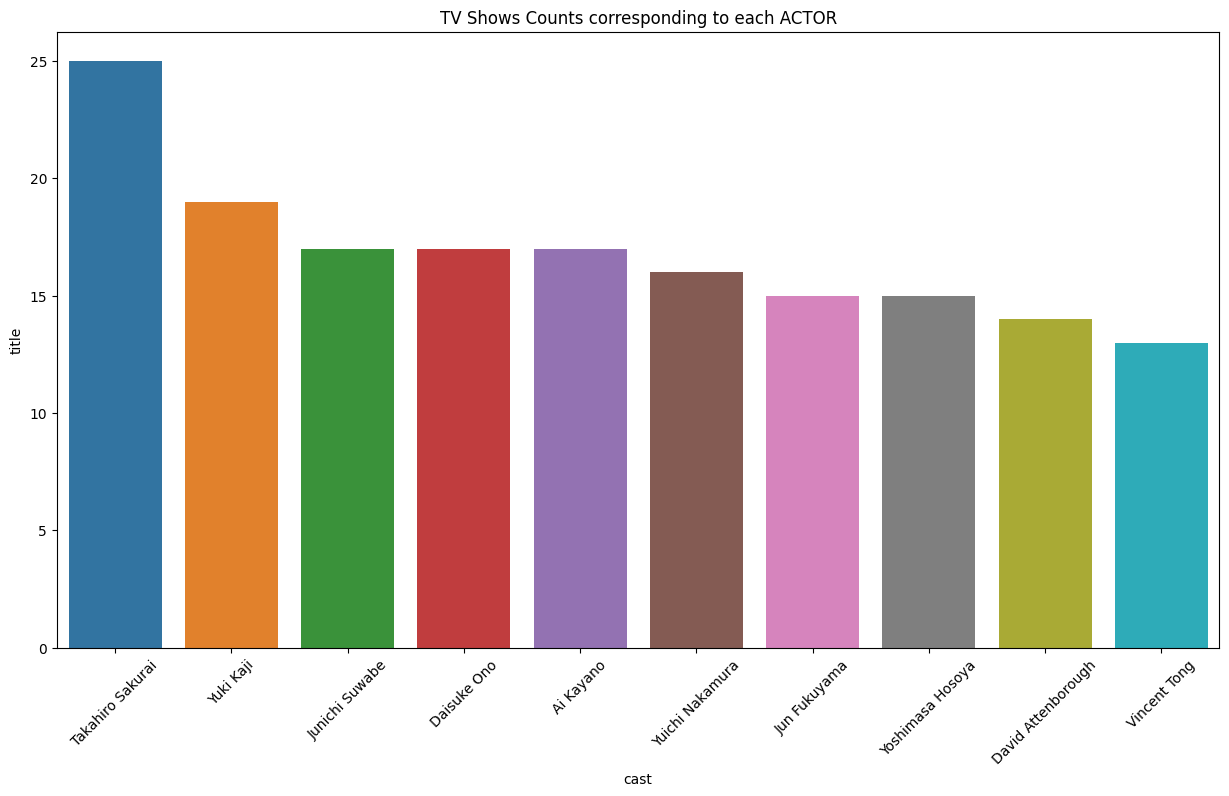

In [145]:
plt.figure(figsize=(15,8))
sns.barplot(x='cast',y='title',data=actor_group_tv)
plt.xticks(rotation=45)
plt.title('TV Shows Counts corresponding to each ACTOR')

plt.show()

b. Identify the top 10 directors who have appeared in most movies or TV shows.

In [130]:
director_group_movie=movies_df.groupby('director')[['title']].nunique()
director_group_movie['title'].astype(int)
director_group_movie.reset_index(inplace=True)
director_group_movie=director_group_movie.sort_values('title',ascending=False).head(11)
director_group_movie.drop(4762,inplace=True)
director_group_movie

,director,title
3582,Rajiv Chilaka,22
1817,Jan Suter,21
3633,Raúl Campos,19
4261,Suhas Kadav,16
2739,Marcus Raboy,15
1862,Jay Karas,15
727,Cathy Garcia-Molina,13
4725,Youssef Chahine,12
2815,Martin Scorsese,12
1859,Jay Chapman,12


In [131]:
director_group_tv=tvshows_df.groupby('director')[['title']].nunique()
director_group_tv['title'].astype(int)
director_group_tv.reset_index(inplace=True)
director_group_tv=director_group_tv.sort_values('title',ascending=False).head(11)
director_group_tv.drop(284,inplace=True)
director_group_tv

,director,title
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
128,Joe Berlinger,2
100,Hsu Fu-chun,2
84,Gautham Vasudev Menon,2
103,Iginio Straffi,2
168,Lynn Novick,2
251,Shin Won-ho,2
235,Rob Seidenglanz,2


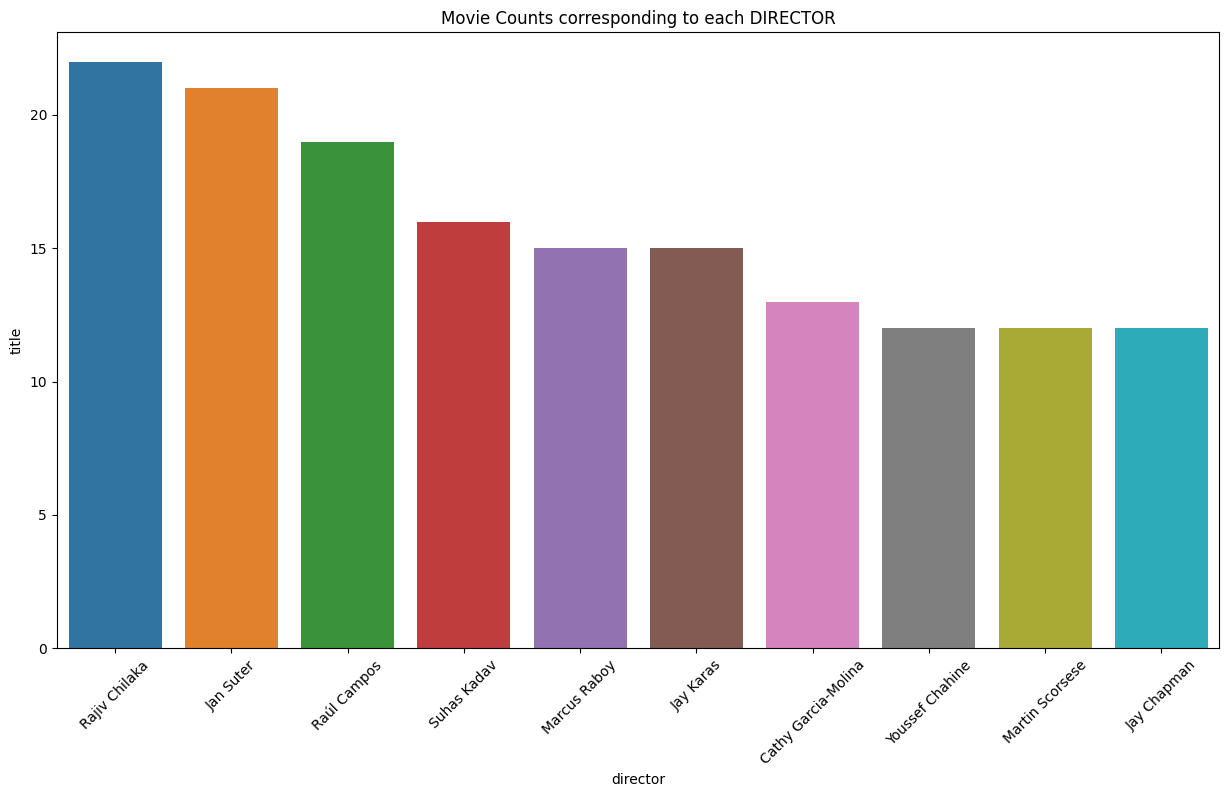

In [143]:
plt.figure(figsize=(15,8))
sns.barplot(x='director',y='title',data=director_group_movie)
plt.xticks(rotation=45)
plt.title('Movie Counts corresponding to each DIRECTOR')

plt.show()

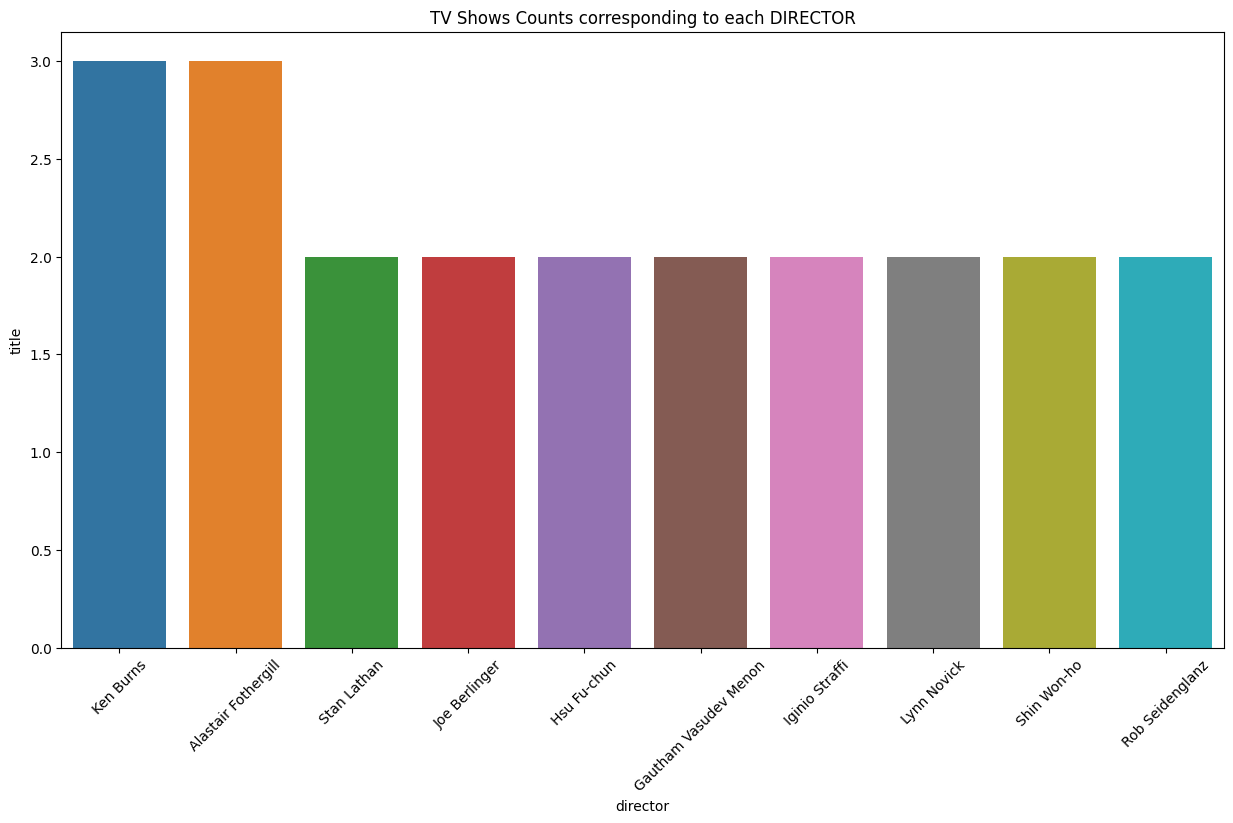

In [144]:
plt.figure(figsize=(15,8))
sns.barplot(x='director',y='title',data=director_group_tv)
plt.xticks(rotation=45)
plt.title('TV Shows Counts corresponding to each DIRECTOR')

plt.show()

# 5. Which genre movies are more popular or produced more

In [134]:
from wordcloud import WordCloud

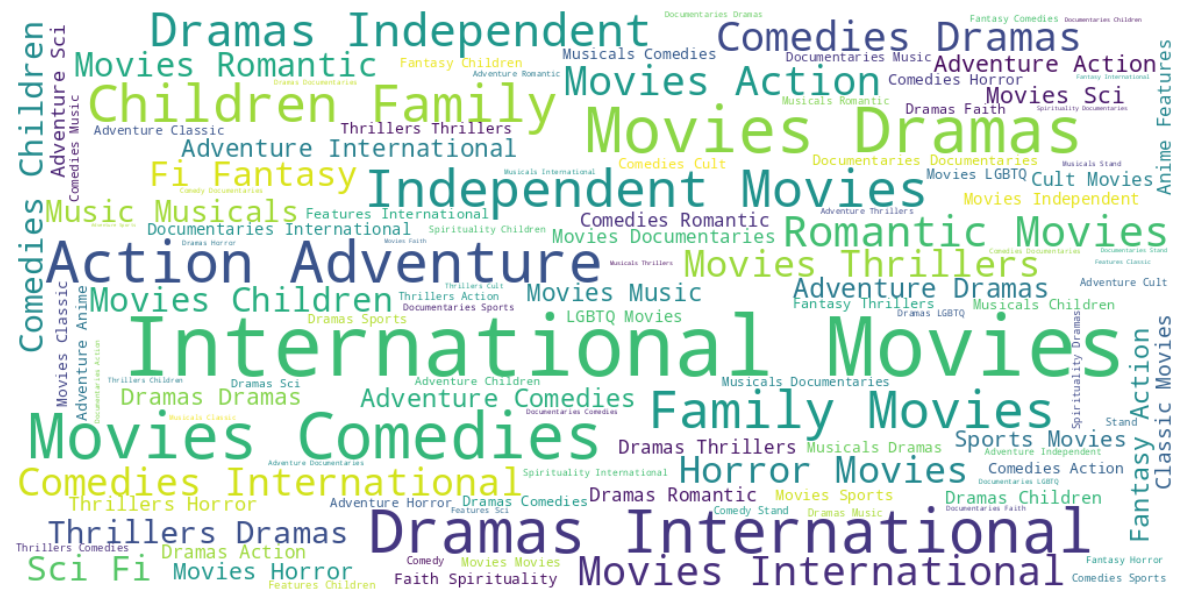

In [137]:
text_data = ' '.join(movies_df['listed_in'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text_data)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.show()

In [138]:
genre_group_movie=movies_df.groupby('listed_in')[['title']].nunique()
genre_group_movie['title'].astype(int)
genre_group_movie.reset_index(inplace=True)
genre_group_movie=genre_group_movie.sort_values('title',ascending=False).head(10)
genre_group_movie

,listed_in,title
11,International Movies,2752
7,Dramas,2427
4,Comedies,1674
6,Documentaries,869
0,Action & Adventure,859
10,Independent Movies,756
2,Children & Family Movies,641
15,Romantic Movies,616
19,Thrillers,577
14,Music & Musicals,375


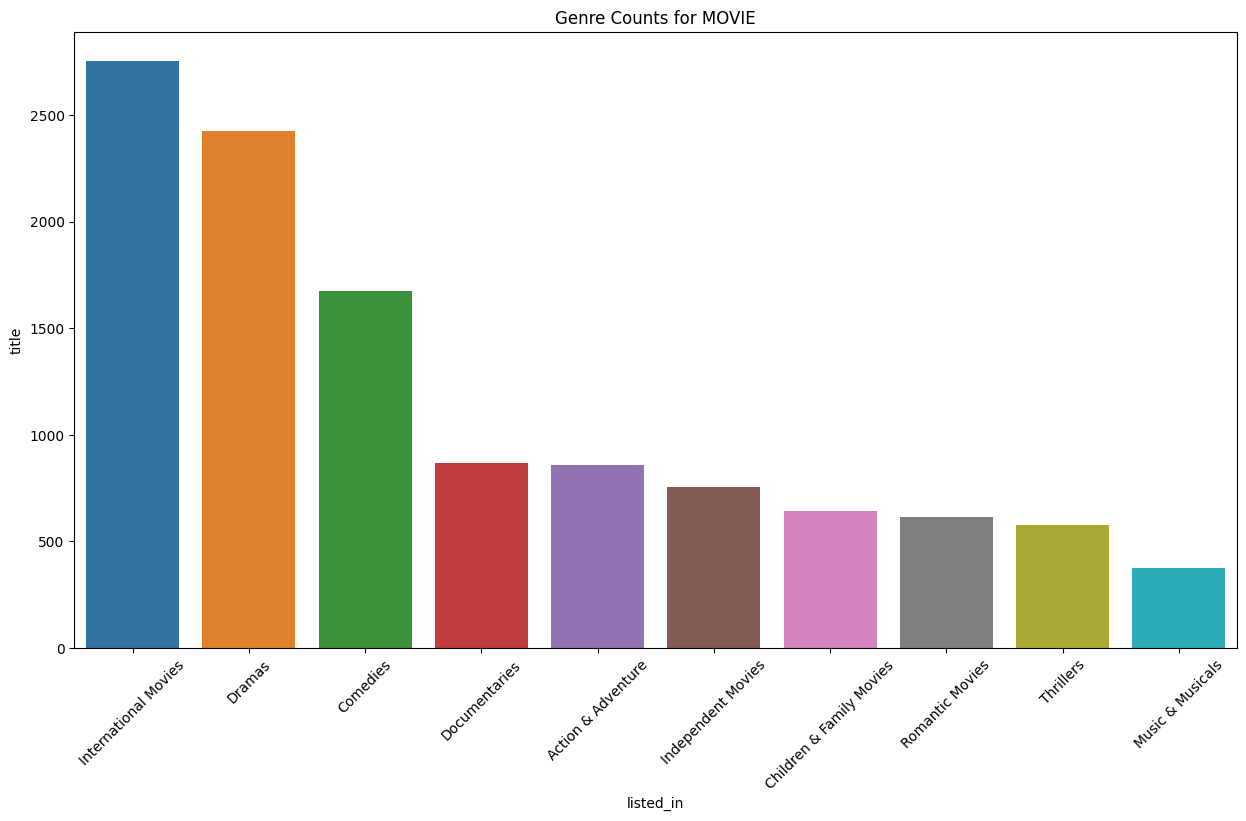

In [142]:
plt.figure(figsize=(15,8))
sns.barplot(x='listed_in',y='title',data=genre_group_movie)
plt.xticks(rotation=45)
plt.title('Genre Counts for MOVIE')
plt.show()

# 6. Find After how many days the movie will be added to Netflix after the release of the movie.

In [140]:
movies_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in,day,week,month,added_year
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020.0,PG-13,90.0,"As her father nears the end of his life, filmm...",Unknown Actor,Kirsten Johnson,United States,Documentaries,25,38,9,2021
1,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021.0,PG,91.0,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,Robert Cullen,unknown_country,Children & Family Movies,24,38,9,2021
2,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021.0,PG,91.0,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,José Luis Ucha,unknown_country,Children & Family Movies,24,38,9,2021
3,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021.0,PG,91.0,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,Robert Cullen,unknown_country,Children & Family Movies,24,38,9,2021
4,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021.0,PG,91.0,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,José Luis Ucha,unknown_country,Children & Family Movies,24,38,9,2021


In [141]:
(movies_df['added_year']-movies_df['release_year']).mode()

0    0.0
dtype: float64

## Observation : Most of the movies were added in the same year as they were released.

# 7. How has the number of movies released per year changed over the last 20-30 years?

In [155]:
year_group_movie=movies_df.groupby('added_year')[['title']].nunique()
year_group_movie['title'].astype(int)
year_group_movie.reset_index(inplace=True)
year_group_movie

,added_year,title
0,2008,1
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,6
6,2014,19
7,2015,56
8,2016,253
9,2017,839


In [157]:
year_group_tv=tvshows_df.groupby('added_year')[['title']].nunique()
year_group_tv['title'].astype(int)
year_group_tv.reset_index(inplace=True)
year_group_tv

,added_year,title
0,2008.0,1
1,2013.0,5
2,2014.0,5
3,2015.0,26
4,2016.0,176
5,2017.0,349
6,2018.0,412
7,2019.0,592
8,2020.0,595
9,2021.0,505


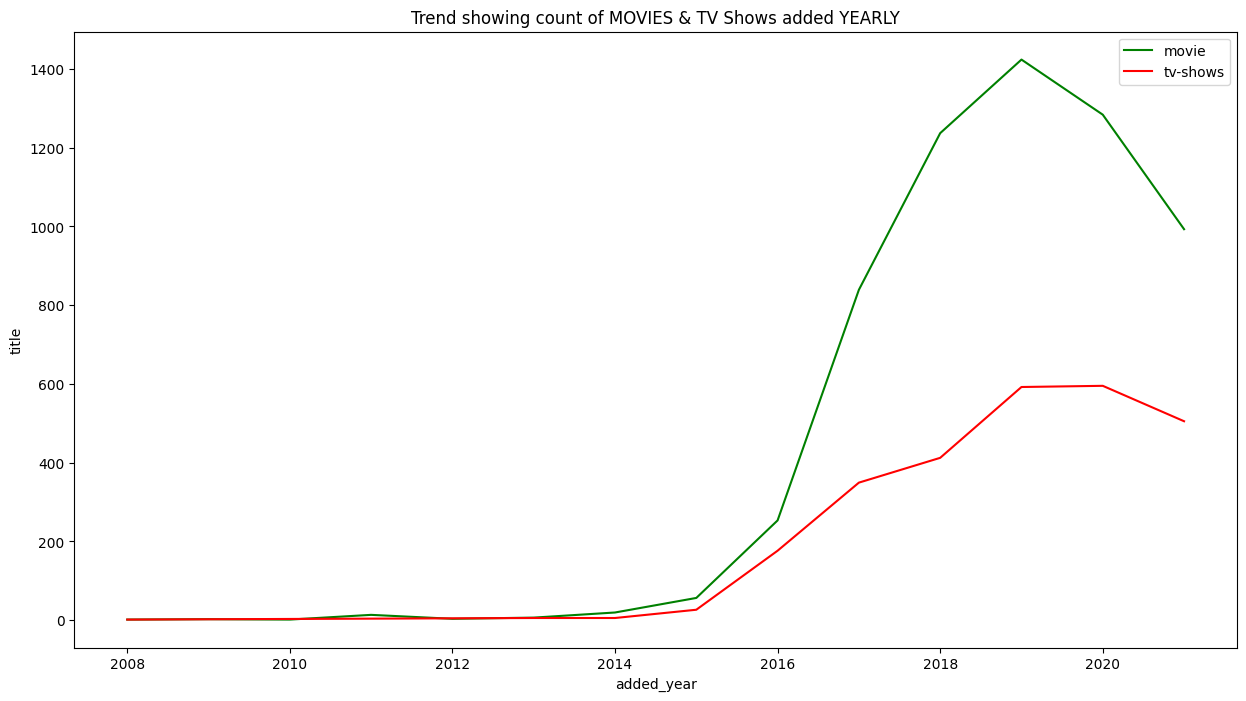

In [159]:
plt.figure(figsize=(15,8))
sns.lineplot(x='added_year',y='title',data=year_group_movie,color='g',label='movie')
sns.lineplot(x='added_year',y='title',data=year_group_tv,color='r',label='tv-shows')
plt.title('Trend showing count of MOVIES & TV Shows added YEARLY')
plt.show()

# OBservation :
##There has been a significant increase in the number of movies/tv-shows that are added in the database YoY with the only exception being 2020 owing to COVID-19 that affected making movies/tv-shows in the first place.

# 8. Understand what content is available in different countries

### For this, let's analyse which Genre has most movies in each of the top 5 countries (i.e, USA, UK, Japan, South Korea, Canada)

In [199]:
USA_genre_df=pd.DataFrame(movies_df.loc[movies_df['country']=='United States'].groupby('listed_in')['title'].nunique()).sort_values('title',ascending=False).head(3)
USA_genre_df.reset_index(inplace=True)
USA_genre_df

,listed_in,title
0,Dramas,835
1,Comedies,680
2,Documentaries,511


In [200]:
India_genre_df=pd.DataFrame(movies_df.loc[movies_df['country']=='India'].groupby('listed_in')['title'].nunique()).sort_values('title',ascending=False).head(3)
India_genre_df.reset_index(inplace=True)
India_genre_df

,listed_in,title
0,International Movies,864
1,Dramas,662
2,Comedies,323


In [201]:
UK_genre_df=pd.DataFrame(movies_df.loc[movies_df['country']=='United Kingdom'].groupby('listed_in')['title'].nunique()).sort_values('title',ascending=False).head(3)
UK_genre_df.reset_index(inplace=True)
UK_genre_df

,listed_in,title
0,Dramas,196
1,International Movies,168
2,Documentaries,127


In [202]:
Canada_genre_df=pd.DataFrame(movies_df.loc[movies_df['country']=='Canada'].groupby('listed_in')['title'].nunique()).sort_values('title',ascending=False).head(3)
Canada_genre_df.reset_index(inplace=True)
Canada_genre_df

,listed_in,title
0,Comedies,94
1,Dramas,82
2,Children & Family Movies,80


In [203]:
France_genre_df=pd.DataFrame(movies_df.loc[movies_df['country']=='France'].groupby('listed_in')['title'].nunique()).sort_values('title',ascending=False).head(3)
France_genre_df.reset_index(inplace=True)
France_genre_df

,listed_in,title
0,International Movies,207
1,Dramas,167
2,Independent Movies,73


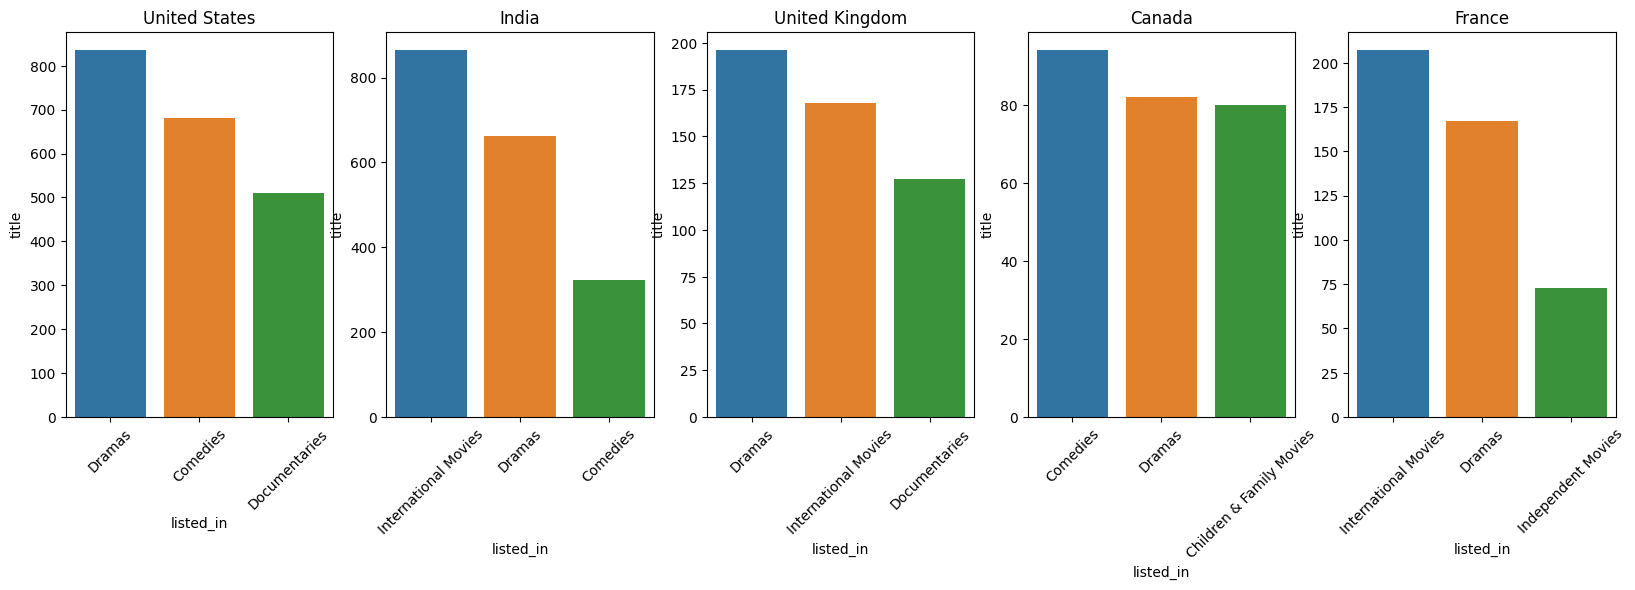

In [204]:
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.title('United States')
sns.barplot(x='listed_in',y='title',data=USA_genre_df)
plt.xticks(rotation=45)

plt.subplot(1,5,2)
plt.title('India')
sns.barplot(x='listed_in',y='title',data=India_genre_df)
plt.xticks(rotation=45)

plt.subplot(1,5,3)
plt.title('United Kingdom')
sns.barplot(x='listed_in',y='title',data=UK_genre_df)
plt.xticks(rotation=45)

plt.subplot(1,5,4)
plt.title('Canada')
sns.barplot(x='listed_in',y='title',data=Canada_genre_df)
plt.xticks(rotation=45)

plt.subplot(1,5,5)
plt.title('France')
sns.barplot(x='listed_in',y='title',data=France_genre_df)
plt.xticks(rotation=45)

plt.show()

# Observation:
## Dramas is there in Top-3 in all of Top-5 countries
## International Movies ,i.e, the top performing Genre overall, is there in 3 out of Top-5 countries